## Synthetic Data Generation

In this section, we generate synthetic data for a simple linear regression problem based on the equation:

\[
y = 2x + 5 + \text{noise}
\]

- We use NumPy to create 100 evenly spaced data points for `x` between 0 and 10.
- Gaussian noise with a small standard deviation is added to simulate real-world imperfections.
- The generated data will be used to train and evaluate different gradient descent algorithms (Batch GD, SGD, and Mini-Batch GD).
- The dataset is split into mini-batches of size 10, preparing it for Mini-Batch Gradient Descent.
- Finally, we plot the noisy data along with the true line `y = 2x + 5` for visual reference.


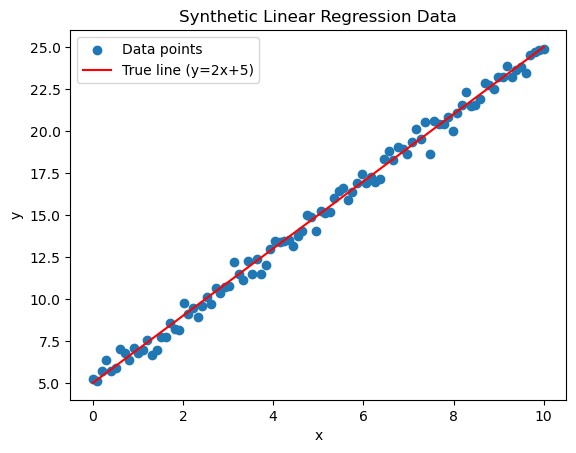

[(array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
         0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091]),
  array([5.24835708, 5.13288805, 5.72788467, 6.36757553, 5.69100412,
         5.89303253, 7.00172762, 6.79785878, 6.38142442, 7.08946184])),
 (array([1.01010101, 1.11111111, 1.21212121, 1.31313131, 1.41414141,
         1.51515152, 1.61616162, 1.71717172, 1.81818182, 1.91919192]),
  array([6.78849317, 6.98935735, 7.54522356, 6.6696225 , 6.96582391,
         7.74915927, 7.72590767, 8.5914671 , 8.1823516 , 8.13223199]))]

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 100
x = np.linspace(0, 10, num_samples)
noise = np.random.normal(0, 0.5, num_samples)  # Low noise
y = 2 * x + 5 + noise

# Split into mini-batches (batch size = 10)
batch_size = 10
num_batches = num_samples // batch_size
mini_batches = [(x[i:i+batch_size], y[i:i+batch_size]) for i in range(0, num_samples, batch_size)]

# Plot the data
plt.scatter(x, y, label="Data points")
plt.plot(x, 2*x + 5, color='red', label="True line (y=2x+5)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Synthetic Linear Regression Data")
plt.show()

# Output first few mini-batches to check
mini_batches[:2]


##  Gradient Descent Optimization Comparison

This notebook explores and compares the behavior of three fundamental optimization methods used in machine learning and deep learning:

- **Batch Gradient Descent (BGD)**
- **Stochastic Gradient Descent (SGD)**
- **Mini-Batch Gradient Descent (MBGD)**

We follow these main steps:

### 1. Synthetic Data Generation
We generate linear data using the equation:  
\[
y = 2x + 5 + \text{noise}
\]  
This data simulates a real-world scenario for a regression task, and it is used to train all three optimizers. For MBGD, the data is split into mini-batches.

### 2. Implementing Optimizers
We implement and run each optimizer:
- **Batch GD** computes the gradient using the entire dataset.
- **SGD** computes the gradient using one random sample at a time.
- **Mini-Batch GD** computes the gradient on small batches (size = 10).

### 3. Cost Function Tracking
We visualize how the cost (Mean Squared Error) changes over time (epochs) for each method. This helps us evaluate convergence speed and stability.

### 4. Contour Plot Visualization
We create a contour map of the cost function in the \((w, b)\) parameter space and overlay the optimization paths taken by each method.

### 5. Advanced Test: Rosenbrock Function
To further analyze the optimizers under a more complex scenario, we optimize the **Rosenbrock function** — a common non-convex benchmark used in optimization problems. The paths of convergence are plotted to evaluate performance visually.

---

This notebook serves both as a practical demonstration of gradient descent variants and as a tool for visual intuition into their convergence behavior.


In [6]:
import time

# Cost function (Mean Squared Error)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Compute gradient
def compute_gradient(x, y, w, b):
    num_samples = len(x)
    y_pred = w * x + b
    dw = (-2 / num_samples) * np.sum(x * (y - y_pred))
    db = (-2 / num_samples) * np.sum(y - y_pred)
    return dw, db

# 2-1: Implementing the Optimizers

def batch_gradient_descent(x, y, lr=0.01, epochs=100):
    w, b = np.random.randn(), np.random.randn()
    history = []
    start = time.time()
    for _ in range(epochs):
        dw, db = compute_gradient(x, y, w, b)
        w -= lr * dw
        b -= lr * db
        history.append((w, b))
    duration = time.time() - start
    return w, b, history, duration, epochs


def stochastic_gradient_descent(x, y, lr=0.01, epochs=100):
    w, b = np.random.randn(), np.random.randn()
    history = []
    updates = 0
    start = time.time()
    for _ in range(epochs):
        idx = np.random.randint(len(x))
        dw, db = compute_gradient(np.array([x[idx]]), np.array([y[idx]]), w, b)
        w -= lr * dw
        b -= lr * db
        history.append((w, b))
        updates += 1
    duration = time.time() - start
    return w, b, history, duration, updates


def mini_batch_gradient_descent(mini_batches, lr=0.01, epochs=100):
    w, b = np.random.randn(), np.random.randn()
    history = []
    updates = 0
    start = time.time()
    for _ in range(epochs):
        for x_batch, y_batch in mini_batches:
            dw, db = compute_gradient(x_batch, y_batch, w, b)
            w -= lr * dw
            b -= lr * db
            history.append((w, b))
            updates += 1
    duration = time.time() - start
    return w, b, history, duration, updates

# Run optimizers
w_batch, b_batch, hist_batch, time_batch, updates_batch = batch_gradient_descent(x, y)
w_sgd, b_sgd, hist_sgd, time_sgd, updates_sgd = stochastic_gradient_descent(x, y)
w_mini, b_mini, hist_mini, time_mini, updates_mini = mini_batch_gradient_descent(mini_batches)

# 3-1: Tracking Criteria
optimizers_history = {
    "Batch GD": hist_batch,
    "SGD": hist_sgd,
    "Mini-Batch GD": hist_mini
}

(w_batch, b_batch, time_batch), (w_sgd, b_sgd, time_sgd), (w_mini, b_mini, time_mini)


((2.3713818992943714, 2.4895125528644773, 0.0006301403045654297),
 (2.5840163304053965, 1.6622413420004394, 0.0007998943328857422),
 (1.9803043268805192, 4.955576225433779, 0.005614757537841797))

### 2-1: Cost Function Change Over Epochs

This section visualizes how the cost (Mean Squared Error) evolves during training for each optimizer:

- **Batch Gradient Descent (BGD)**: Uses the entire dataset to compute gradients per epoch.
- **Stochastic Gradient Descent (SGD)**: Updates weights using a single random sample each epoch.
- **Mini-Batch Gradient Descent (MBGD)**: Updates weights using small subsets (mini-batches) of the data per epoch.

Since MBGD performs multiple updates per epoch (one per mini-batch), we adjust the cost values by averaging them over each epoch for fair comparison.

#### Plot Details:
- **X-axis**: Epoch number
- **Y-axis**: Cost (Mean Squared Error)
- **Line styles**:
  - Solid: BGD
  - Dashed: SGD
  - Dotted: MBGD (adjusted per epoch)

This helps us compare convergence rates and stability of the optimizers visually.


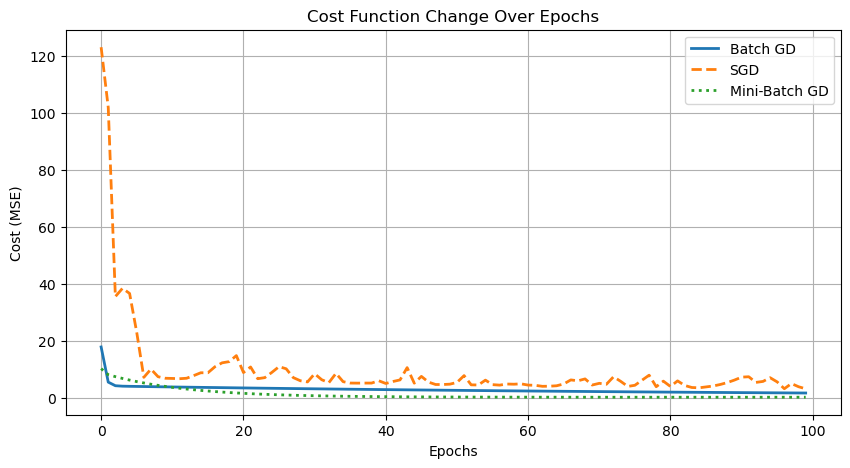

In [7]:
# 2-1: Cost Function Plot
epochs = range(len(hist_batch)) # All optimizers used the same number of epochs
# Compute cost values for each optimizer at each epoch
costs_batch = [mse(y, w*x + b) for w, b in hist_batch]
costs_sgd = [mse(y, w*x + b) for w, b in hist_sgd]
costs_mini = [mse(y, w*x + b) for w, b in hist_mini]

# Adjust cost tracking for Mini-Batch GD by averaging over each epoch
costs_mini_adjusted = [np.mean(costs_mini[i * num_batches: (i + 1) * num_batches]) for i in range(len(hist_batch))]

plt.figure(figsize=(10, 5))
plt.plot(epochs, costs_batch, label="Batch GD", linewidth=2)
plt.plot(epochs, costs_sgd, label="SGD", linewidth=2, linestyle="dashed")
plt.plot(epochs, costs_mini_adjusted, label="Mini-Batch GD", linewidth=2, linestyle="dotted")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Change Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

### 2-2: Contour Plot of Cost Function and Optimizer Paths

This section visualizes the shape of the cost function in the parameter space (weight `w` vs. bias `b`) using contour lines. Each contour represents a constant cost (Mean Squared Error) value for combinations of `w` and `b`.

We also overlay the paths taken by each optimizer:

- **Batch Gradient Descent (BGD)**: Red line
- **Stochastic Gradient Descent (SGD)**: Blue line
- **Mini-Batch Gradient Descent (MBGD)**: Green line

These paths show how each optimizer navigates the cost surface to minimize the error.

#### Plot Details:
- **X-axis**: Weight (`w`)
- **Y-axis**: Bias (`b`)
- **Contour Lines**: Represent levels of the MSE cost
- **Path Markers**: Show parameter updates across iterations

This plot provides intuition on convergence behavior, stability, and efficiency of each optimizer in a 2D parameter space.


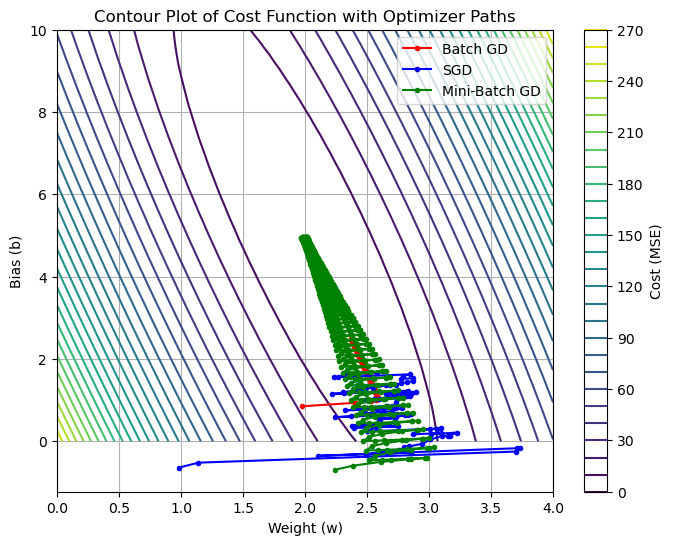

In [8]:
# 2-2: Contour Plot
w_range = np.linspace(0, 4, 50)
b_range = np.linspace(0, 10, 50)
W, B = np.meshgrid(w_range, b_range)
cost_values = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        y_pred = W[i, j] * x + B[i, j]
        cost_values[i, j] = mse(y, y_pred)

w_batch_path, b_batch_path = zip(*hist_batch)
w_sgd_path, b_sgd_path = zip(*hist_sgd)
w_mini_path, b_mini_path = zip(*hist_mini)

plt.figure(figsize=(8, 6))
plt.contour(W, B, cost_values, levels=30, cmap="viridis")
plt.colorbar(label="Cost (MSE)")
plt.plot(w_batch_path, b_batch_path, "ro-", label="Batch GD", markersize=3)
plt.plot(w_sgd_path, b_sgd_path, "bo-", label="SGD", markersize=3)
plt.plot(w_mini_path, b_mini_path, "go-", label="Mini-Batch GD", markersize=3)
plt.xlabel("Weight (w)")
plt.ylabel("Bias (b)")
plt.title("Contour Plot of Cost Function with Optimizer Paths")
plt.legend()
plt.grid(True)
plt.show()

### 3: Rosenbrock Function Optimization (Advanced Test)

In this final test, we evaluate the performance of each optimizer on the **Rosenbrock function**, a common benchmark in optimization known for its narrow, curved valley leading to the global minimum.

#### Function Definition:
The Rosenbrock function is defined as:
\[
f(x, y) = (1 - x)^2 + 100(y - x^2)^2
\]
It poses a challenge for optimization algorithms due to its steep sides and flat valley floor.

####  Optimization Methods:
We simulate three versions of gradient descent:
- **Batch GD**: Uses exact gradients.
- **SGD**: Adds noise to simulate sample-based updates.
- **Mini-Batch GD**: Uses smaller noise for moderate stochasticity.

Each optimizer starts from a random initial point and runs for a fixed number of iterations.

#### Plot Interpretation:
The contour plot shows the Rosenbrock function's shape and the optimization trajectories:
- **Red**: Batch Gradient Descent
- **Blue**: Stochastic Gradient Descent
- **Green**: Mini-Batch Gradient Descent

This plot helps visualize how each optimizer navigates the difficult terrain of the Rosenbrock function and how well it converges toward the global minimum near (1, 1).


0.0053179264068603516 0.0007998943328857422 0.0033948421478271484


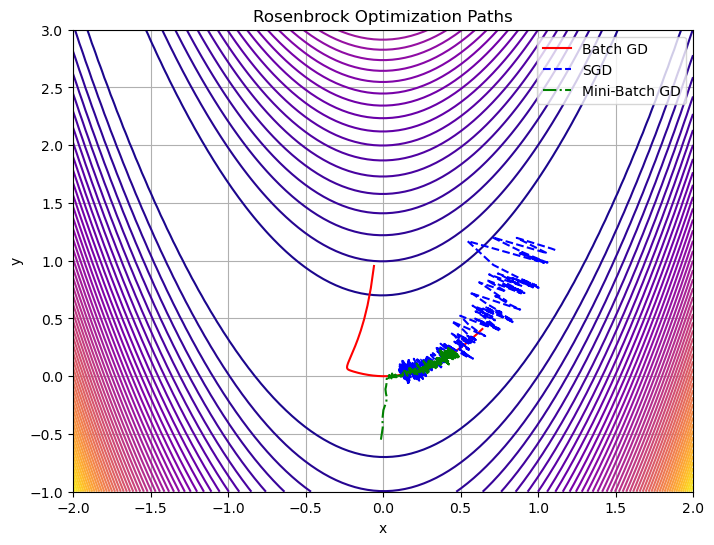

In [21]:
# 3: Rosenbrock Function Optimization (Advanced Test)
def rosenbrock(xy):
    x, y = xy
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

def rosenbrock_grad(xy):
    x, y = xy
    dx = -2 * (1 - x) - 400 * x * (y - x ** 2)
    dy = 200 * (y - x ** 2)
    return np.array([dx, dy])

def optimizer_rosenbrock(method, lr=0.001, epochs=1000):
    path = []
    point = np.array([np.random.randn(), np.random.randn()])
    start = time.time()
    for i in range(epochs):
        if method == "batch":
            grad = rosenbrock_grad(point)
        elif method == "sgd":
            grad = rosenbrock_grad(point + np.random.normal(0, 0.1, size=2))
        elif method == "mini":
            grad = rosenbrock_grad(point + np.random.normal(0, 0.05, size=2))
        point -= lr * grad
        path.append(point.copy())
    duration = time.time() - start
    return np.array(path), duration

x_range = np.linspace(-2, 2, 100)
y_range = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.array([[rosenbrock([x, y]) for x in x_range] for y in y_range])

path_batch, t_batch = optimizer_rosenbrock("batch")
path_sgd, t_sgd = optimizer_rosenbrock("sgd")
path_mini, t_mini = optimizer_rosenbrock("mini")

print(t_batch, time_sgd, t_mini)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=50, cmap="plasma")
plt.plot(path_batch[:, 0], path_batch[:, 1], 'r-', label='Batch GD')
plt.plot(path_sgd[:, 0], path_sgd[:, 1], 'b--', label='SGD')
plt.plot(path_mini[:, 0], path_mini[:, 1], 'g-.', label='Mini-Batch GD')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Rosenbrock Optimization Paths")
plt.legend()
plt.grid(True)
plt.show()